<a href="https://colab.research.google.com/github/chhyyi/aiffel/blob/main/LMS/lms_exp9_follow_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LMS EXP9

## pixellib를 제대로 설치하기 위한 시도와 실패(성공한 거는 밑에 따로 나옴)

pixellib 설치하다가 Error가 떴는데 실행시키는데는 상관 없는 것인가?
>ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.4 which is incompatible.

그래서 click 7.1.2.를 깔았더니 또 이런 메시지가 뜬다.  
>ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sahi 0.10.4 requires click==8.0.4, but you have click 7.1.2 which is incompatible.
black 22.6.0 requires click>=8.0.0, but you have click 7.1.2 which is incompatible.

우짜라는겨? sahi인지 flask인지 click인지 지웠다 깔았다 하니까 버전 업데이트가 많이 됐다. 그런데 아래를 하다 보니 pixellib.semantic이 tensorflow의 뭔가를 불러오다가 에러가 뜬다.  
> ---> 15 from tensorflow.python.keras.layers import BatchNormalization

그래서 tensorflow도 업그레이드를 했다. 그런데도 해결이 안돼서 자세히 살펴보니 이런 식으로 keras의 레이어를 import하고 있다.
```python
from tensorflow.python.keras.layers import BatchNormalization
```
그래서 중간에 python을 지우고 그냥 실행시켜보니 잘 된다. 그래서 저 파일을 수정하려고 colab 터미널에서 
```shell
vim /usr/local/lib/python3.7/dist-packages/pixellib/semantic/deeplab.py
```
이렇게 접근해보려고 했는데 내가 평소에 쓰던 vim이나 vi같은 것은 깔려있지 않았다! 그래서 colab 파일 시스템에서 경로를 찾아들어가 tensorflow.python 을 tensorflow로 수정하고 실행을 해봐야지. 해보니까 일괄적으로 tensorflow.python을 지우면 안되고 일부는 python을 놔둬야 한다. 아무튼 임포트 하는 부분을 다음과 같이 수정하였다.
```python
from tensorflow.keras.layers import BatchNormalization
```
그런데 tensorflow 내부 파일을 수정하는게 맞나? 아닌 것 같다.


# 1. 라이브러리 버전 맞추기, 파일 불러오기
keras설치할 때 zzzcolab20220506153740이 typing-extensions-=3.7.4 버전이 필요하다는데 내가 4.1.1을 가지고 있다고 한다. 근데 아무튼 밑에는 실행이 된다...  
__런타임 초기화 되면 설치 후 런타임 다시 시작 필요!!__

In [ ]:
!pip3 uninstall tensorflow -y
!pip3 install tensorflow==2.6.0

In [ ]:
!pip3 uninstall keras -y
!pip3 install keras==2.6.0

In [ ]:
!pip3 install Pillow==8.3.2

이거 ㄴ역시 numpy 1.22.2를 다운받지 못한다고 하는데 아무튼 밑에 import는 잘 돌아간다. 일단 tensorflow와 keras의 버전을 맞추는게 중요한 거 같다.

In [ ]:
!pip3 install numpy==1.22.2
!pip3 install typing_extensions==4.1.1
!pip3 install pixellib==0.7.1

In [ ]:
import os
import urllib #url로 라이브러리를 다운받기 위한 
import cv2 #OpenCV
import numpy as np
from pixellib.semantic import semantic_segmentation #semantic segmentation 안만들고 이거 쓸거임
from matplotlib import pyplot as plt

(1280, 960, 3)


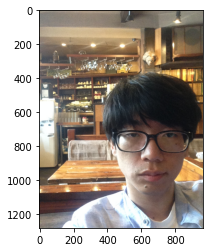

In [ ]:
path = r"/content/drive/MyDrive/colabdata/modulabs/lms_exp9/"
img_path = path+r"IMG_0122.png"
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 2. semantic segmentation (9-4)

In [ ]:
# 저장할 파일 이름을 결정합니다
model_dir = path
model_file = os.path.join(path, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/colabdata/modulabs/lms_exp9/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f85a852b150>)

In [ ]:
#pixellib와 model file을 이용해 학습된 모델을 불러옵니다.
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
#이제 이미지 파일을 모델에 먹입니다.
segvalues, output = model.segmentAsPascalvoc(img_path)

__pillow 의 에러__ : 모델에 이미지를 feed하는 부분에서 문제가 생겨 pillow를 8.3.2버전으로 새로 설치했습니다. 자세한 이유는 모르겠는데 아무튼

In [ ]:
#PASCAL VOC 데이터의 라벨은 이렇다고 합니다.
#그런데 이걸 왜 어딘가에서 불러오지 않고 직접 써넣을까요?
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

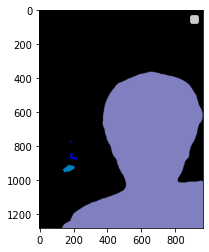

In [ ]:
plt.imshow(output)
plt.show()

이것을 보면 마스킹이 꽤 잘 된 것 같습니다.


In [ ]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
diningtable
person


In [ ]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[15]

array([192, 128, 128])

(1280, 960) (1280, 960, 3)


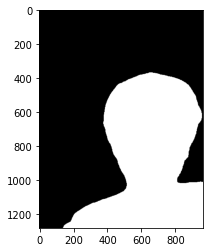

In [ ]:
seg_color=[128,128,192]
seg_map = np.all(output==seg_color, axis=2) # 2 or -1
print(seg_map.shape, output.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

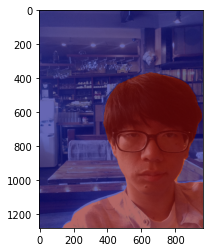

In [ ]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.4, color_mask, 0.6, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 3. 배경만 blur 처리 하기

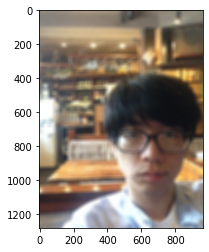

In [ ]:
img_orig_blur = cv2.blur(img_orig, (26,26))  
#사진이 좀 크니까 저것도 좀 키웁니다.
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

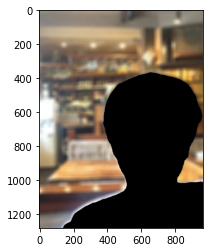

In [ ]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

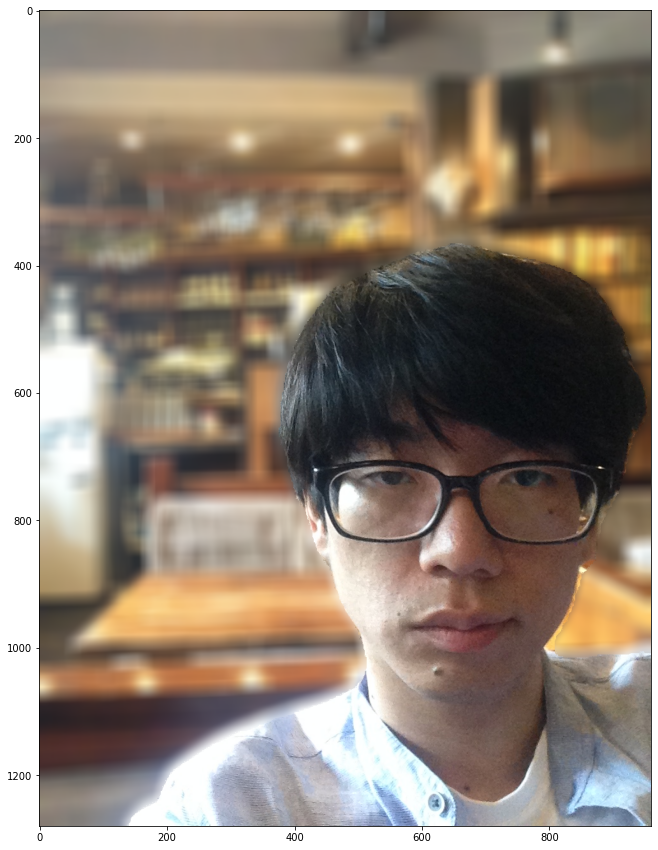

In [ ]:
plt.figure(figsize=(20,15))
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

__문제점 찾아보기__ 이 사진에서는 딱히 문제점이 보이지 않습니다. 다른 사진으로 하는 것이 좋겠네요.

# 4. 동물 사진 배경 블러하기

(1280, 960, 3)


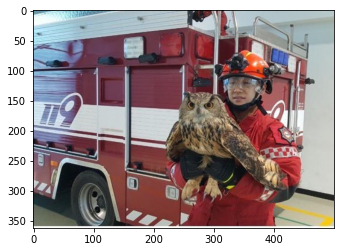

In [36]:
bird_orig=cv2.imread(path+"IMG_3559.png")

print(img_orig.shape)
plt.imshow(cv2.cvtColor(bird_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
segvalues, output = model.segmentAsPascalvoc(path+"IMG_3559.png")

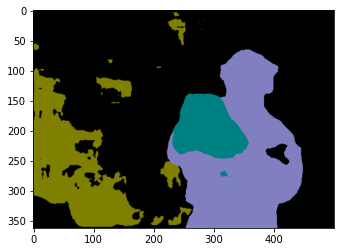

In [38]:
plt.imshow(output)
plt.show()

이전 결과에서, bird의 label은 3이었습니다.

In [47]:
print(segvalues['class_ids'])
for x in segvalues['class_ids']:
    print(LABEL_NAMES[x])

[ 0  3  6 15]
background
bird
bus
person


소방차를 버스라고 인식한 것은 조금 잘못됐지만 크게 틀리지는 않았습니다. 하지만 bird나 소방차 모두 범위가 그다지 정확해 보이지는 않네요.

In [48]:
colormap[3] #bird color

array([128, 128,   0])

(362, 500) (362, 500, 3)


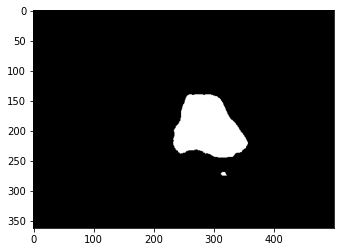

In [49]:
seg_color=[0,128,128] #BGR to RGB
seg_map = np.all(output==seg_color, axis=2)
print(seg_map.shape, output.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [51]:
bird_show = bird_orig.copy()
bird_mask = seg_map.astype(np.uint8)*255
color_mask = cv2.applyColorMap(bird_mask,cv2.COLORMAP_JET)

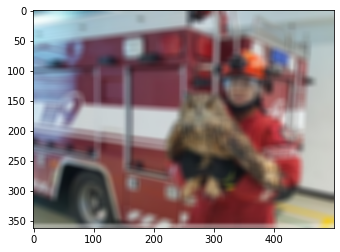

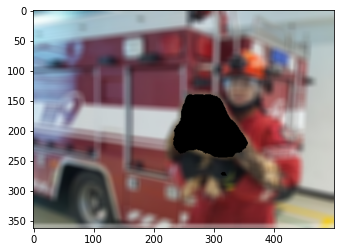

In [54]:
bird_blur = cv2.blur(bird_orig, (13,13))  
#blur의 tuple은 사진 크기에 따라 변경할것
plt.imshow(cv2.cvtColor(bird_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(bird_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(bird_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()


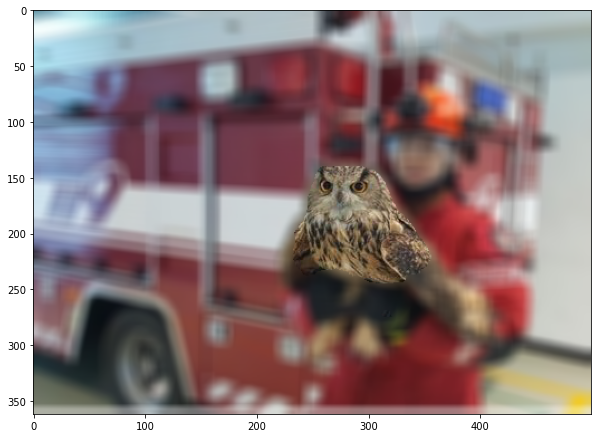

In [55]:
plt.figure(figsize=(10,7.5))
img_concat = np.where(img_mask_color==255, bird_orig, bird_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

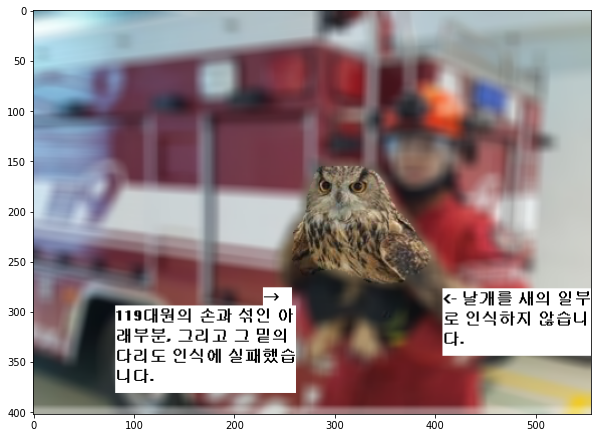

In [60]:
plt.figure(figsize=(10,7.5))
captioned_img=cv2.imread(path+"bird_failure.png")
plt.imshow(cv2.cvtColor(captioned_img, cv2.COLOR_BGR2RGB))
plt.show()

#배경 바꾸기



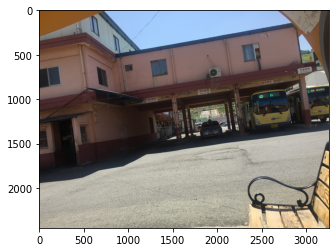

In [62]:
new_bg=cv2.imread(path+"background2.jpg")
plt.imshow(cv2.cvtColor(new_bg, cv2.COLOR_BGR2RGB))
plt.show()

이걸 하려면 먼저 사진에서 사람만 잘라낸 사진과 같은 방식으로, 사진에서 사람만 남긴 사진이 필요합니다. 이것은 위에 썼던 코드에서 조건식을 not으로 바꾸면 간단합니다. 실제로는 not을 적용한 쓴 자리에 원래 것을 쓰면 되겠네요.

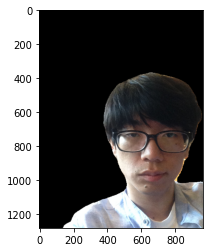

In [67]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_person = cv2.bitwise_and(img_orig, img_mask_color)
plt.imshow(cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB))
plt.show()

그 다음은 두 사진의 크기가 문제가 됩니다. 이것은 슬라이스를 통해 해결할 수 있습니다.

In [82]:
print(new_bg.shape, img_person.shape)

(2448, 3264, 3) (1280, 960, 3)


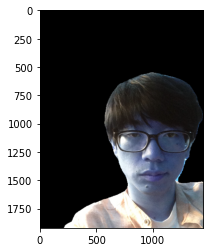

In [98]:
img_person_resized=cv2.resize(img_person, (1440, 1920))
img_mask_color_resized=cv2.resize(img_mask_color, (1440, 1920))

plt.imshow(img_person_resized)
plt.show()

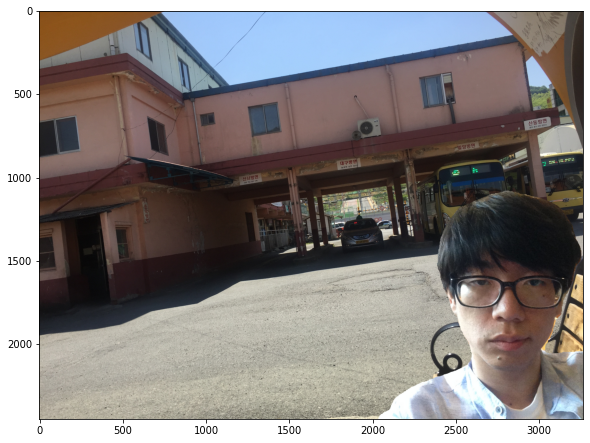

In [99]:
plt.figure(figsize=(10,7.5))
img_concat = np.where(img_mask_color_resized!=255, new_bg[2448-1920:2448,3264-1440:3264], img_person_resized)
new_bg_concat=new_bg.copy()
new_bg_concat[2448-1920:2448,3264-1440:3264]=img_concat
plt.imshow(cv2.cvtColor(new_bg_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 맺음말
제출기한을 7시간 17분 남기고 허겁지겁 채점기준에서 쉽게 할 수 있는 것만 해서 냅니다.  

동물 종류 넷 중에서는 하나를 골랐습니다. 개, 고양이, 새, 말이 있었ㅈ. 새는 굉장히 범위가 넓다는 생각이 들었습니다. 펭귄이나 타조, 백조와 오목눈이 등의 차이가 고양이나 개의 subclass차이보다 훨씬 크지 않을까요? 물론 그렇지 않을 수도 있습니다. 새가 어떤 식의 데이터로 학습됐는지 궁금하네요. 사람이랑 배경은 다 제가 찍어서 휴대폰에 있던 사진입니다. 동물은 고양이 사진 뿐이었는데, 다 배경과 동물이 붙어있는 사진이라 그냥 웹에서 찾은 사진을 썼습니다. 저작권이 제게 없으니 혹시라도 다른데 공유하지는 말아주세요.  

배경은 청도의 한 터미널인데, 찍은지 엄청 오래되지는 않았습니다. 꽤 낡았죠? 이 지역은 경부선이 지나가는데 기차를 많이 탄다고 하네요.